<a href="https://colab.research.google.com/github/DrKenReid/Introductory-Data-Science/blob/main/Day_1_Lab_3_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression in Detail

### Creating a Linear Regression Model

**Step 1: Understanding the Model**

Linear regression is a statistical method used to model the relationship between a dependent variable (y) and one or more independent variables (x). The goal is to find the best-fitting line that predicts y from x.

The linear regression equation is:
y = w * x + b
Where:
- y is the predicted value.
- x is the input feature.
- w is the weight (coefficient).
- b is the intercept.

### Training the Model

**Step 2: Fitting the Model**

To train the model, we need to find the values of w and b that minimize the difference between the actual values and the predicted values. This is done by minimizing the cost function, which is usually the Mean Squared Error (MSE).

The cost function is:
MSE = (1/n) * Σ (y_i - (w * x_i + b))^2
Where:
- n is the number of data points.
- y_i is the actual value.
- x_i is the input feature value.
- w and b are the model parameters to be learned.

### Making Predictions

**Step 3: Predicting with the Model**

Once the model is trained, we can use it to make predictions on new data. The prediction for a new input x is given by:
y_pred = w * x + b

### Evaluating the Model

**Step 4: Assessing Performance**

To evaluate the model's performance, we use metrics such as Mean Squared Error (MSE) and R-squared (R²).

**Mean Squared Error (MSE):**

MSE measures the average of the squares of the errors (the differences between observed and predicted values):
MSE = (1/n) * Σ (y_i - y_pred_i)^2
Where:
- y_pred_i is the predicted value for the i-th data point.

**R-squared (R²):**

R² measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s):
R² = 1 - (Σ (y_i - y_pred_i)^2 / Σ (y_i - y_mean)^2)
Where:
- y_mean is the mean of the actual values.

### Summary

- **Creating the Model:** Define the linear relationship between the input features and the target variable.
- **Training the Model:** Find the optimal values for the weight (w) and intercept (b) by minimizing the cost function (MSE).
- **Making Predictions:** Use the trained model to predict new values based on the learned linear relationship.
- **Evaluating the Model:** Assess the model's performance using metrics like MSE and R² to determine how well it predicts the target variable.

# Hands-on Exercise: Regression Techniques using Scikit-learn

### Problem Description/Dataset:

The California Housing Prices dataset contains information about various attributes of residential houses in different districts of California, along with their corresponding median house prices. The dataset consists of 20,640 samples and 8 features. Each sample represents a block group, which is the smallest geographical unit for which the U.S. Census Bureau publishes sample data. The goal of using this dataset is to build a predictive model that can estimate the median house value based on the given features.
- The house prices are scaled by a factor of 100,000, so a value of 1.0 corresponds to a price of $100,000.
- The dataset has been preprocessed to remove missing values and outliers.
- The dataset is split into a training set and a testing set for evaluating the performance of regression models.

### Key Features:
1. MedInc: Median income in the block (in US dollars)
2. HouseAge: Median house age in the block (in years)
3. AveRooms: Average number of rooms per household
4. AveBedrms: Average number of bedrooms per household
5. Population: Block population
6. AveOccup: Average number of household members
7. Latitude: Block latitude (in degrees)
8. Longitude: Block longitude (in degrees)

### The target variable is:
MedHouseVal: Median house value for households within a block (in US dollars)

## Step 1: Loading and Preprocessing the Dataset

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the California Housing Prices dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 2: Implementing Linear Regression

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
linear_predictions = linear_model.predict(X_test_scaled)

# Evaluate the model using MSE and R-squared
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

print("Linear Regression:")
print("MSE:", linear_mse)
print("R-squared:", linear_r2)


Linear Regression:
MSE: 0.5558915986952442
R-squared: 0.575787706032451


Interpretation:

on average, the model’s predictions deviate from the actual values by the square root of the [MSE value];
approximately [R-squared value]*100% of the observed variation can be explained by the model's inputs

Given that the R-squared is not very high, we could consider trying different types of models that could capture complex patterns better, like polynomial regression.

We can also take a look at the following plots to see if the relationship is linear: actual vs. predicted values, and residual plot.

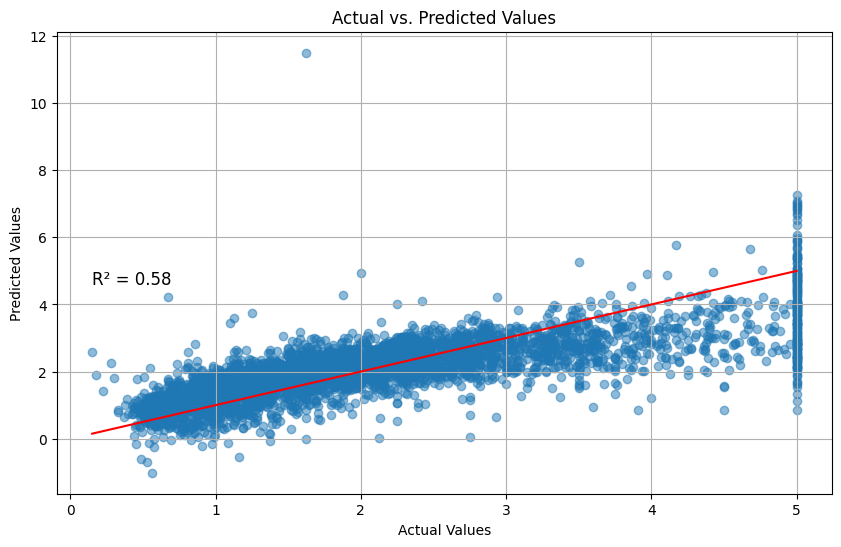

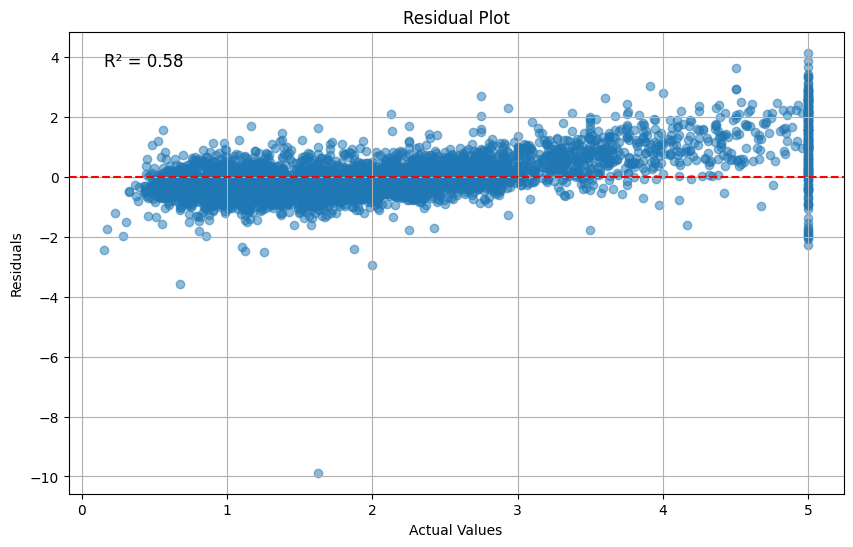

In [4]:
import matplotlib.pyplot as plt

# Scatter plot of Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_predictions, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for perfect predictions
plt.text(min(y_test), max(y_test), f'R² = {linear_r2:.2f}', fontsize=12, verticalalignment='top')  # Add R-squared to the plot ##################
plt.grid(True)
plt.show()

# Residual plot This line of code calculates the residuals for a linear regression model.
##- `y_test` represents the actual observed values from the test dataset.
##- `linear_predictions` represents the predicted values from the linear regression model for the test dataset.
# The residuals are calculated by subtracting the predicted values from the actual values.
## This difference (`y_test - linear_predictions`) shows the errors made by the model in its predictions.
# Residuals indicate how far off the model's predictions are from the actual values, helping to assess the
# model's accuracy and identify any patterns in the prediction errors.
residuals = y_test - linear_predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')
plt.text(min(y_test), max(residuals), f'R² = {linear_r2:.2f}', fontsize=12, verticalalignment='top')  # Add R-squared to the plot #################
plt.grid(True)
plt.show()


From plots above, we can see that the relationship is approximately linear, for lower and mid-range values. But for higher values, the relationship might not be linear.

## Polynomial Regression in Detail

### Understanding Polynomial Regression

**Step 1: Understanding the Model**

Polynomial regression is an extension of linear regression that models the relationship between the dependent variable (y) and the independent variable (x) as an nth degree polynomial. It allows for a better fit to data that has a non-linear relationship.

The polynomial regression equation for a degree n is:
y = b0 + b1 * x + b2 * x^2 + ... + bn * x^n
Where:
- y is the predicted value.
- x is the input feature.
- b0, b1, ..., bn are the coefficients of the polynomial.

### Transforming the Data

**Step 2: Polynomial Features**

To apply polynomial regression, the input features (x) are transformed to include polynomial terms up to the desired degree.

For example, for a 2nd degree polynomial:
x' = [1, x, x^2]
Where x' is the transformed feature vector.

### Creating the Polynomial Regression Model

**Step 3: Fitting the Model**

After transforming the input features, a linear regression model is trained using these polynomial features.

The cost function, similar to linear regression, is usually the Mean Squared Error (MSE).

Cost function:
MSE = (1/n) * Σ (y_i - (b0 + b1 * x_i + b2 * x_i^2 + ... + bn * x_i^n))^2
Where:
- n is the number of data points.
- y_i is the actual value.
- x_i is the input feature value.
- b0, b1, ..., bn are the model parameters to be learned.

### Making Predictions

**Step 4: Predicting with the Model**

Once the model is trained, it can be used to make predictions on new data. The prediction for a new input x is given by:
y_pred = b0 + b1 * x + b2 * x^2 + ... + bn * x^n

### Evaluating the Model

**Step 5: Assessing Performance**

To evaluate the model's performance, we use metrics such as Mean Squared Error (MSE) and R-squared (R²).

**Mean Squared Error (MSE):**

MSE measures the average of the squares of the errors (the differences between observed and predicted values):
MSE = (1/n) * Σ (y_i - y_pred_i)^2
Where:
- y_pred_i is the predicted value for the i-th data point.

**R-squared (R²):**

R² measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s):
R² = 1 - (Σ (y_i - y_pred_i)^2 / Σ (y_i - y_mean)^2)
Where:
- y_mean is the mean of the actual values.

### Summary

- **Understanding the Model:** Polynomial regression models the relationship between the input features and the target variable as an nth degree polynomial.
- **Transforming the Data:** Transform the input features to include polynomial terms up to the desired degree.
- **Fitting the Model:** Train the model using the transformed polynomial features by minimizing the cost function (MSE).
- **Making Predictions:** Use the trained model to predict new values based on the learned polynomial relationship.
- **Evaluating the Model:** Assess the model's performance using metrics like MSE and R² to determine how well it predicts the target variable.

## Step 3: Implementing Polynomial Regression


In [5]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features of degree 2
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

# Create a polynomial regression model
poly_model = LinearRegression()

# Train the model
poly_model.fit(X_train_poly, y_train)

# Make predictions on the test set
poly_predictions = poly_model.predict(X_test_poly)

# Evaluate the model using MSE and R-squared
poly_mse = mean_squared_error(y_test, poly_predictions)
poly_r2 = r2_score(y_test, poly_predictions)

print("Polynomial Regression:")
print("MSE:", poly_mse)
print("R-squared:", poly_r2)



Polynomial Regression:
MSE: 0.464301523830125
R-squared: 0.6456819729261882


To improve model fit (find a balance between underfitting and overfitting), we could consider adjusting the degree of the polynomial.

## Step 4: Applying Regularization Techniques


To reduce overfitting for models with a large number of features, we can apply regularization techniques like Ridge and Lasso:

## Regularization Techniques

**Description:**  
Regularization techniques are methods used to prevent overfitting in machine learning models by adding a penalty to the loss function. This penalty discourages the model from fitting too closely to the training data, helping it generalize better to new data. Regularization can improve model performance and stability by constraining the complexity of the model.

## Lasso Regression

**Description:**  
Lasso regression (Least Absolute Shrinkage and Selection Operator) is a regularization technique that adds a penalty equal to the absolute value of the coefficients to the loss function. This penalty can shrink some coefficients to exactly zero, effectively performing feature selection by excluding irrelevant features.

**Penalty Term:**  
λ * Σ|w_i|

Where:
- λ (lambda) is the regularization parameter.
- w_i are the model coefficients.

## Ridge Regression

**Description:**  
Ridge regression, also known as Tikhonov regularization, is a regularization technique that adds a penalty equal to the square of the magnitude of the coefficients to the loss function. This penalty discourages large coefficients, helping to reduce multicollinearity and overfitting, but it does not perform feature selection.

**Penalty Term:**  
λ * Σ(w_i^2)

Where:
- λ (lambda) is the regularization parameter.
- w_i are the model coefficients.

## Regularization Techniques

### Questions and Answers

**Question:** What is the purpose of regularization in machine learning?  
**Answer:** Regularization aims to prevent overfitting by adding a penalty to the loss function, which constrains the model's complexity and improves generalization to new data.

**Question:** How does regularization affect model coefficients?  
**Answer:** Regularization techniques add a penalty to the loss function, which can shrink the coefficients towards zero, thereby reducing the impact of less important features.

**Question:** What are the common types of regularization techniques?  
**Answer:** The most common types of regularization techniques are Lasso (L1) and Ridge (L2) regression.

## Lasso Regression

### Questions and Answers

**Question:** What is Lasso regression?  
**Answer:** Lasso regression is a regularization technique that adds a penalty equal to the absolute value of the coefficients to the loss function, which can shrink some coefficients to zero and perform feature selection.

**Question:** How does the penalty term in Lasso regression affect the model?  
**Answer:** The penalty term in Lasso regression encourages sparsity in the model by shrinking some coefficients to zero, effectively removing less important features.

**Question:** When would you use Lasso regression over other techniques?  
**Answer:** Lasso regression is useful when you want to perform feature selection and reduce the number of features in your model by setting some coefficients to zero.

## Ridge Regression

### Questions and Answers

**Question:** What is Ridge regression?  
**Answer:** Ridge regression is a regularization technique that adds a penalty equal to the square of the magnitude of the coefficients to the loss function, which discourages large coefficients and reduces multicollinearity.

**Question:** How does the penalty term in Ridge regression affect the model?  
**Answer:** The penalty term in Ridge regression discourages large coefficients, which helps to reduce overfitting and improve the model's generalization to new data.

**Question:** When would you use Ridge regression over other techniques?  
**Answer:** Ridge regression is useful when you want to reduce multicollinearity and overfitting without performing feature selection, as it shrinks coefficients but does not set them to zero.

#### Lasso

In [6]:
from sklearn.linear_model import Lasso, Ridge

# Create a Lasso regularization model
lasso_model = Lasso(alpha=0.1)

# Train the Lasso model
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
lasso_predictions = lasso_model.predict(X_test_scaled)

# Evaluate the Lasso model using MSE and R-squared
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)

print("Lasso Regularization:")
print("MSE:", lasso_mse)
print("R-squared:", lasso_r2)

Lasso Regularization:
MSE: 0.6796290284328821
R-squared: 0.4813611325029077


The MSE and R-sequred values suggest that the choice of alpha (0.1) might need adjustment to find a balance between underfitting and overfitting.

In [7]:
# (optional) eg, LassoCV can automatically find an optimal alpha value based on data:

from sklearn.linear_model import LassoCV
# the following code is very similar to the code above; just using a different model
lasso_cv_model = LassoCV(alphas=None, cv=10, max_iter=10000)
lasso_cv_model.fit(X_train_scaled, y_train)
lasso_optimal_model = Lasso(alpha=lasso_cv_model.alpha_)
lasso_optimal_model.fit(X_train_scaled, y_train)
lasso_optimal_predictions = lasso_optimal_model.predict(X_test_scaled)
optimal_lasso_mse = mean_squared_error(y_test, lasso_optimal_predictions)
optimal_lasso_r2 = r2_score(y_test, lasso_optimal_predictions)
print("Optimal Lasso Regularization:")
print("Optimal Alpha:", lasso_cv_model.alpha_)
print("MSE:", optimal_lasso_mse)
print("R-squared:", optimal_lasso_r2)


Optimal Lasso Regularization:
Optimal Alpha: 0.0008562263550679982
MSE: 0.5546838771890883
R-squared: 0.5767093431138581


There is a slight improvement compared to the initial Lasso model. This suggests that either the model is already doing about as well as it can with linear methods or that other factors like feature selection or model type might need to be further adjusted.

#### Ridge

In [8]:
# Create a Ridge regularization model
ridge_model = Ridge(alpha=0.1)

# Train the Ridge model
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
ridge_predictions = ridge_model.predict(X_test_scaled)

# Evaluate the Ridge model using MSE and R-squared
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)

print("Ridge Regularization:")
print("MSE:", ridge_mse)
print("R-squared:", ridge_r2)

Ridge Regularization:
MSE: 0.5558879138674184
R-squared: 0.5757905180002312


The Ridge model performs nearly identically to the Lasso model in terms of MSE and R-squared. This may suggest that simple linear models (even with regularization) have reached a performance ceiling for the data we have right now.

We could explore non-linear models like decision trees, support vector machines, and random forest (as introduced in lab2) to capture complex patterns in the data.

## Step 5: Interpreting and Discussing the Results

Remember to update the values if you refined the following models:

In [9]:
# Compare the performance of different models
print("Model Performance Comparison:")
print("Linear Regression - MSE: {:.4f}, R-squared: {:.4f}".format(linear_mse, linear_r2))
print("Polynomial Regression - MSE: {:.4f}, R-squared: {:.4f}".format(poly_mse, poly_r2))
print("Lasso Regularization - MSE: {:.4f}, R-squared: {:.4f}".format(lasso_mse, lasso_r2))
print("Ridge Regularization - MSE: {:.4f}, R-squared: {:.4f}".format(ridge_mse, ridge_r2))

Model Performance Comparison:
Linear Regression - MSE: 0.5559, R-squared: 0.5758
Polynomial Regression - MSE: 0.4643, R-squared: 0.6457
Lasso Regularization - MSE: 0.6796, R-squared: 0.4814
Ridge Regularization - MSE: 0.5559, R-squared: 0.5758


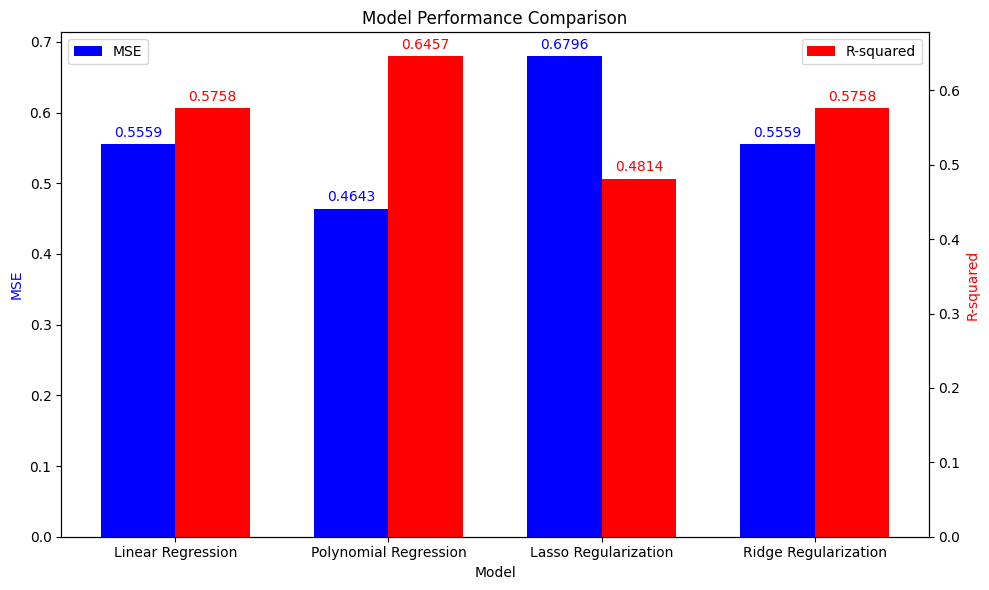

In [10]:
# visualization

import matplotlib.pyplot as plt
import numpy as np

models = ['Linear Regression', 'Polynomial Regression', 'Lasso Regularization', 'Ridge Regularization']
mse_values = [linear_mse, poly_mse, lasso_mse, ridge_mse]
r_squared_values = [linear_r2, poly_r2, lasso_r2, ridge_r2]

x = np.arange(len(models))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))
rects1 = ax1.bar(x - width/2, mse_values, width, label='MSE', color='b')

ax2 = ax1.twinx()
rects2 = ax2.bar(x + width/2, r_squared_values, width, label='R-squared', color='r')

ax1.set_xlabel('Model')
ax1.set_ylabel('MSE', color='b')
ax2.set_ylabel('R-squared', color='r')
ax1.set_title('Model Performance Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Function to attach a text label above each bar displaying its height
def autolabel(rects, ax, color):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', color=color)

autolabel(rects1, ax1, 'b')
autolabel(rects2, ax2, 'r')

fig.tight_layout()
plt.show()


The smaller the MSE, the better the model's predictive accuracy. The higher the R-squred value, the better the model fits the data.

## Model Performance Comparison Observations

- **Linear Regression:**
  - Mean Squared Error (MSE): 0.5559
  - R-squared (R²): 0.5758
  - Performance: Moderate fit with relatively low MSE and moderate R-squared value.

- **Polynomial Regression:**
  - Mean Squared Error (MSE): 0.4643
  - R-squared (R²): 0.6457
  - Performance: Best fit among the models with the lowest MSE and highest R-squared value, indicating a better fit to the data compared to Linear Regression.

- **Lasso Regularization:**
  - Mean Squared Error (MSE): 0.6796
  - R-squared (R²): 0.4814
  - Performance: Worst fit among the models with the highest MSE and lowest R-squared value, suggesting it may have overly penalized the model, reducing its predictive power.

- **Ridge Regularization:**
  - Mean Squared Error (MSE): 0.5559
  - R-squared (R²): 0.5758
  - Performance: Same MSE and R-squared as Linear Regression, indicating that Ridge Regularization did not significantly change the model's performance in this case. This could imply that multicollinearity was not a significant issue in the data.

## Conclusion

Congratulations on completing this comprehensive lab on regression techniques! Throughout this exercise, you've successfully:

1. Loaded and preprocessed the California Housing Prices dataset
2. Implemented and evaluated several regression models:
   - Linear Regression
   - Polynomial Regression
   - Lasso Regression
   - Ridge Regression
3. Applied feature scaling using StandardScaler
4. Performed polynomial feature transformation
5. Implemented regularization techniques (Lasso and Ridge)
6. Evaluated model performance using Mean Squared Error (MSE) and R-squared (R²) metrics
7. Visualized model comparisons using scatter plots, residual plots, and bar charts

Key takeaways from this lab:

- Polynomial Regression outperformed Linear Regression, indicating non-linear relationships in the data
- Regularization techniques (Lasso and Ridge) helped in addressing overfitting, with varying degrees of success
- The importance of model selection and hyperparameter tuning in achieving optimal performance
- The value of visualizing results to gain insights into model behavior and performance

This lab has provided you with hands-on experience in implementing and comparing various regression algorithms, understanding the impact of feature transformation and regularization, and interpreting model performance metrics. These skills are great for tackling real-world predictive modeling problems and selecting the most appropriate regression technique for a given dataset.